Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[29  0]
 [ 0 16]]


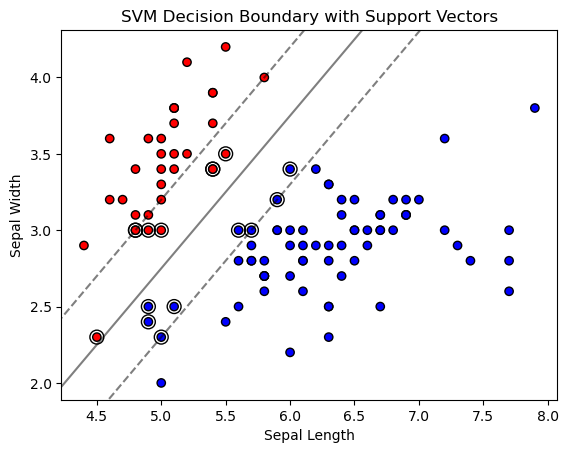

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = (iris.target == 0).astype(int)  # Binary classification: Setosa vs Non-Setosa

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
def plot_hyperplane(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    support_vectors = model.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

plot_hyperplane(X_train, y_train, model)
